In [1]:
# .geojsonファイルをDictとして読み込む
import json

with open('./data/geojson_filtered_by_settlement/筑地.geojson', 'r') as f:
    data = json.load(f)
# print(data)

# GeoJSONデータをgpd.GeoDataFrameに変換
import geopandas as gpd

gdf = gpd.GeoDataFrame.from_features(data['features'])
gdf.head()

,geometry,polygon_uuid,land_type,issue_year,edit_year,history,last_polygon_uuid,prev_last_polygon_uuid,local_government_cd,point_lng,...,SectionOfPolygonCodeName,DaichoId,daicho_shubetsu_cd,CommencementDate,EndStagesDate,UseIntentionInvestigationDate,Settlement_id,Settlement_name,Settlement_pref,Settlement_city
0,"POLYGON ((140.3778 36.37503, 140.37778 36.3751...",edad72c2-a9d9-44c5-85a7-b8a7b141eb1a,100,2024,2020,[{'筆ポリゴンID': '4adb940c-36c9-40a7-bb7b-88a21284...,4adb940c-36c9-40a7-bb7b-88a212840e2e,6e278408-d2b0-4d1e-845f-883dea2c08a1,082015,140.378240,...,その他,81009535,KNO01,None,None,None,006,筑地,茨城県,水戸市
1,"POLYGON ((140.3766 36.37601, 140.37657 36.3761...",bbce7562-d4af-4c32-9256-ac23e0562af1,100,2024,2020,[{'筆ポリゴンID': '6f3c12a9-7c9b-45e1-bf1a-211531f3...,6f3c12a9-7c9b-45e1-bf1a-211531f38051,681d5417-51c1-4b49-a071-b07b98622342,082015,140.377036,...,その他,"81009529, 81009541",KNO01,None,None,None,006,筑地,茨城県,水戸市
2,"POLYGON ((140.37664 36.37573, 140.37659 36.375...",e5d53da1-3199-4cea-b472-57a468504605,100,2024,2020,[{'筆ポリゴンID': '308a48e7-fd6e-4f51-a35d-47afb42a...,308a48e7-fd6e-4f51-a35d-47afb42a12fb,f9963c97-04f0-4e5b-8217-9605cb7a6b41,082015,140.377079,...,その他,81009530,KNO01,20210319,20260331,None,006,筑地,茨城県,水戸市
3,"POLYGON ((140.37394 36.3701, 140.37386 36.3698...",8af11e07-a310-40d4-bc6b-017f93b53afc,200,2024,2020,[{'筆ポリゴンID': '586de863-0e1a-4d1c-a087-dfc0072a...,586de863-0e1a-4d1c-a087-dfc0072ab084,aa3501c6-ddc0-40a6-9de8-4bf951c50b85,082015,140.373818,...,その他,81009010,KNO01,None,None,None,006,筑地,茨城県,水戸市
4,"POLYGON ((140.37199 36.37171, 140.37214 36.371...",73a589a8-ed63-43d7-baf4-b315b386a308,100,2024,2020,[{'筆ポリゴンID': '79b30ad5-940d-47ea-bfd6-a61271ca...,79b30ad5-940d-47ea-bfd6-a61271ca70ba,74bda683-7056-4952-b680-0c955f773a4f,082015,140.371795,...,その他,81009277,KNO01,20120319,20220331,None,006,筑地,茨城県,水戸市


In [ ]:
import geopandas as gpd

# 田と畑のデータを読み込む
gdf = gpd.read_file("./data/geojson_filtered_by_settlement/筑地.geojson")
gdf.columns


Index(['polygon_uuid', 'land_type', 'issue_year', 'edit_year', 'history',
       'last_polygon_uuid', 'prev_last_polygon_uuid', 'local_government_cd',
       'point_lng', 'point_lat', 'num_farm_pins', 'FarmCommitteeCd',
       'FarmCommitteeName', 'TodofukenCode', 'ShikuchosonCode', 'OazaCode',
       'ClassificationOfLandCodeName', 'ClassificationOfLand',
       'AreaOnRegistry', 'SectionOfNoushinhouCodeName', 'SectionOfNoushinhou',
       'SectionOfToshikeikakuhouCodeName', 'SectionOfToshikeikakuhou',
       'OwnerFarmIntentionCodeName', 'OwnerFarmIntention',
       'FarmerIndicationNumberHash', 'KindOfRightCodeName', 'KindOfRight',
       'RightSettingContentsCodeName', 'RightSettingContents',
       'UsageSituationInvestigationDate',
       'UsageSituationInvestigationResultCodeName',
       'UsageSituationInvestigationResult',
       'OwnerStatementIntentSurveyResultsCodeName',
       'OwnerStatementIntentSurveyResults',
       'UseIntentionAscertainmentResultCodeName',
       'Us

In [14]:
print(gdf['Settlement_name'].unique())

['筑地']


In [9]:
# ClassificationOfLandの値を確認
print(gdf["ClassificationOfLandCodeName"].unique())

['田' '田, 畑' '畑' '畑, 田']


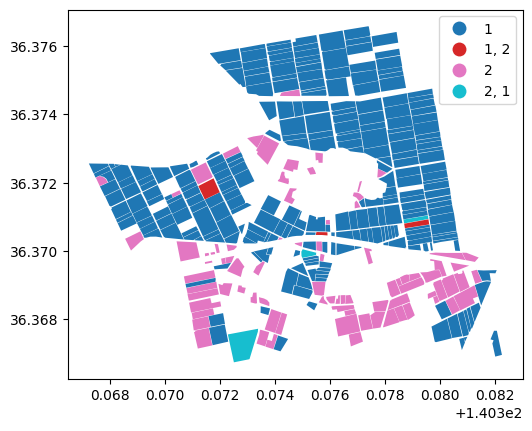

In [8]:
# ClassificationOfLandの値で色分けしてmatplotlibで表示
import matplotlib.pyplot as plt
gdf.plot(column="ClassificationOfLand", legend=True)
plt.show()

In [ ]:
ta_gdf["is_isolated"] = ~ta_gdf.intersects(ta_gdf.buffer(10)).any(axis=1)


In [ ]:

# 田と畑を分ける
ta_gdf = gdf[gdf["type"] == "田"]
ha_gdf = gdf[gdf["type"] == "畑"]

# 田の近傍に畑しかないものを孤立とみなす
ta_gdf["is_isolated"] = ~ta_gdf.intersects(ta_gdf.buffer(10)).any(axis=1)

# 畑の近傍に田しかないものを孤立とみなす
ha_gdf["is_isolated"] = ~ha_gdf.intersects(ha_gdf.buffer(10)).any(axis=1)

# 孤立している田と畑を取得
isolated_ta = ta_gdf[ta_gdf["is_isolated"]]
isolated_ha = ha_gdf[ha_gdf["is_isolated"]]

# 結果を保存
isolated_ta.to_file("isolated_ta.geojson", driver="GeoJSON")
isolated_ha.to_file("isolated_ha.geojson", driver="GeoJSON")

In [20]:
gdf['ClassificationOfLand'].head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
343    2
344    2
345    1
346    1
347    2
Name: ClassificationOfLand, Length: 348, dtype: object>

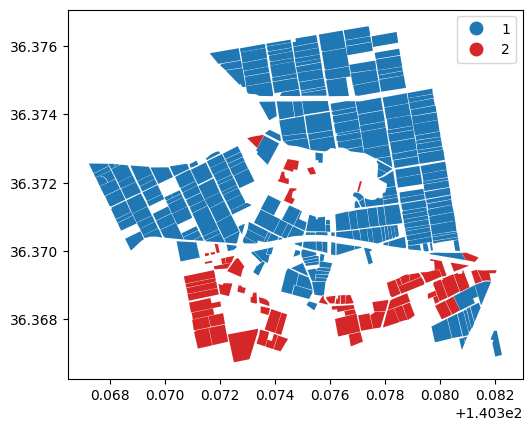

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# サンプルデータの読み込み
file_path = "./data/geojson_filtered_by_settlement/筑地.geojson"
gdf = gpd.read_file(file_path)

# 隣接するポリゴンの分類を基に変更を行う関数
def reclassify_land(gdf, distance):
    # 空間インデックスを作成
    sindex = gdf.sindex

    # 各ポリゴンの新しい分類を格納するリスト
    new_classifications = gdf["ClassificationOfLand"].copy()

    for i, geom in enumerate(gdf.geometry):
        # print(str(i) + "番目のポリゴン")
        # 一定の距離内のポリゴンを検索
        buffer = geom.buffer(distance)
        nearby = gdf[gdf.geometry.intersects(buffer)]

        # 一定の距離内のポリゴンの分類を取得
        neighbor_classifications = nearby["ClassificationOfLand"]

        # 一定の距離内のポリゴンの分類のカウント
        counts = neighbor_classifications.value_counts()

        # 現在の分類
        current_classification = gdf.loc[i, "ClassificationOfLand"]
        # print("現在："+current_classification)
        # print("隣接するポリゴンの分類："+str(counts))

        # 隣接するポリゴンの分類に基づいて変更
        if current_classification == "2" and counts.get("1", 0) > counts.get("2", 0):
            # print("畑を田に変更")
            new_classifications[i] = "1"
        elif current_classification == "1" and counts.get("2", 0) > counts.get("1", 0):
            new_classifications[i] = "2"
            # print("田を畑に変更")
        elif current_classification == "1, 2" and counts.get("1", 0) > counts.get("2", 0):
            new_classifications[i] = "1"
            # print("田畑を畑に変更")
        elif current_classification == "1, 2" and counts.get("2", 0) >= counts.get("1", 0):
            new_classifications[i] = "2"
            # print("田畑を田に変更")
        elif current_classification == "2, 1" and counts.get("1", 0) > counts.get("2", 0):
            new_classifications[i] = "1"
            # print("畑田を畑に変更")
        elif current_classification == "2, 1" and counts.get("2", 0) >= counts.get("1", 0):
            new_classifications[i] = "2"
            # print("畑田を田に変更")

    # 新しい分類を適用
    gdf["ClassificationOfLand"] = new_classifications
    return gdf

# 土地の分類を再分類
distance = 50
gdf = reclassify_land(gdf, distance/1000/100)

# 結果を表示
import matplotlib.colors as mcolors

# カラーマップを作成
cmap = plt.get_cmap("tab10")
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# プロット
gdf.plot(column="ClassificationOfLand", cmap=cmap, norm=norm, legend=True)
plt.show()

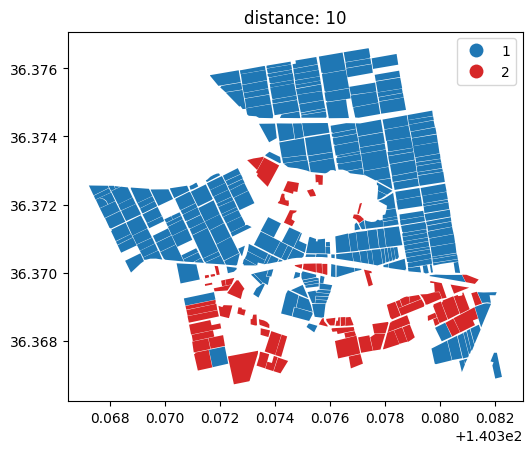

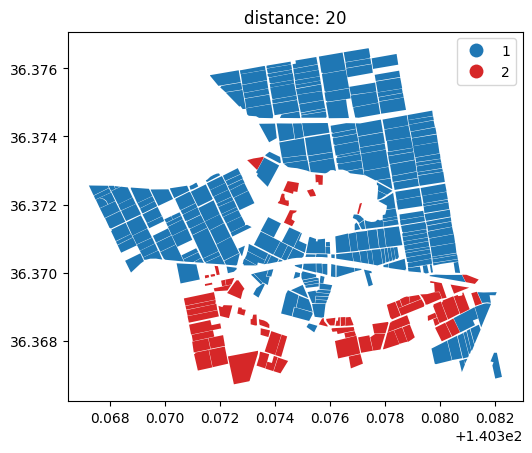

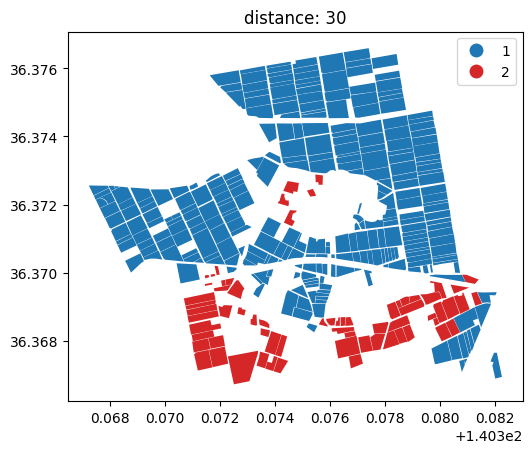

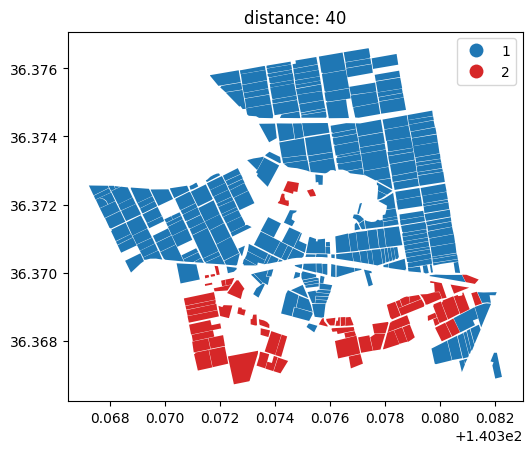

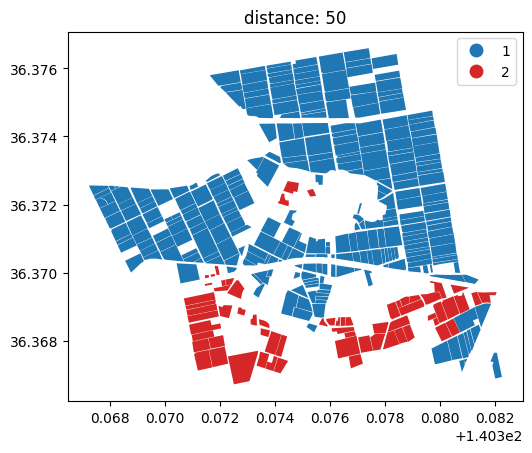

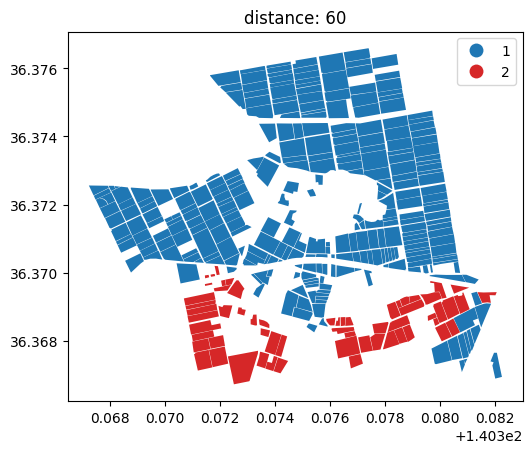

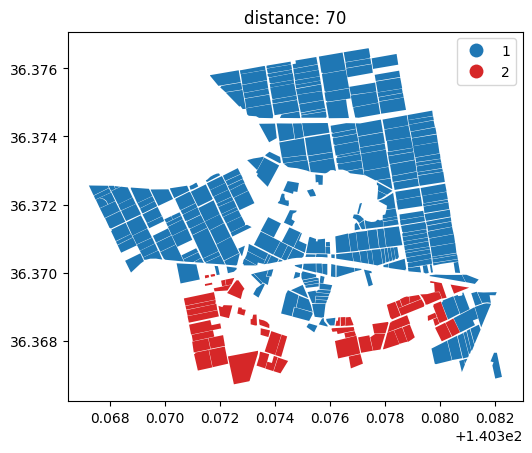

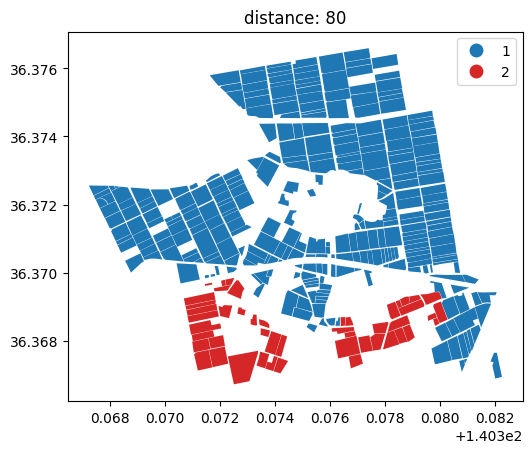

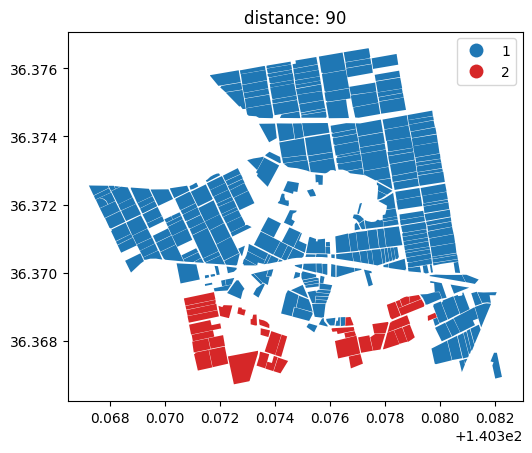

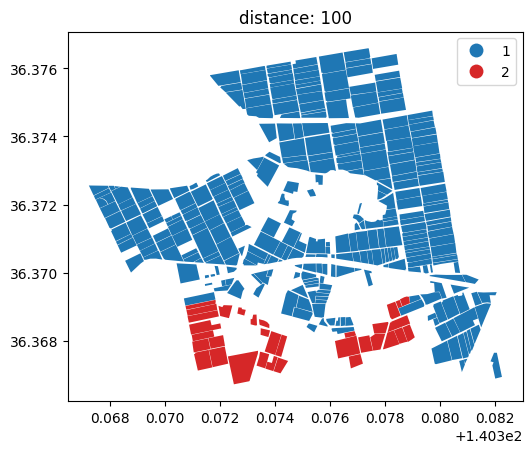

In [58]:
# 閾値distanceを10から100まで変化させて再分類
original_gdf = gpd.read_file(file_path)
for distance in range(10, 101, 10):
    classified_gdf = reclassify_land(original_gdf, distance/1000/100)
    classified_gdf.plot(column="ClassificationOfLand", cmap=cmap, norm=norm, legend=True)
    plt.title("distance: " + str(distance))
    plt.show()

In [62]:
distance = 30
classified_gdf = reclassify_land(original_gdf, distance/1000/100)
# ClassificationOfLandCodeNameも更新
classified_gdf["ClassificationOfLandCodeName"] = classified_gdf["ClassificationOfLand"].map({
    "1": "田",
    "2": "畑"
})
classified_gdf.to_file("reclassified_land.geojson", driver="GeoJSON")


/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserW

/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbor_areas = nearby.geometry.area
/var/folders/3x/t05685j130vgh1jgcmlkr9tc0000gn/T/ipykernel_76028/2512891202.py:20: UserW

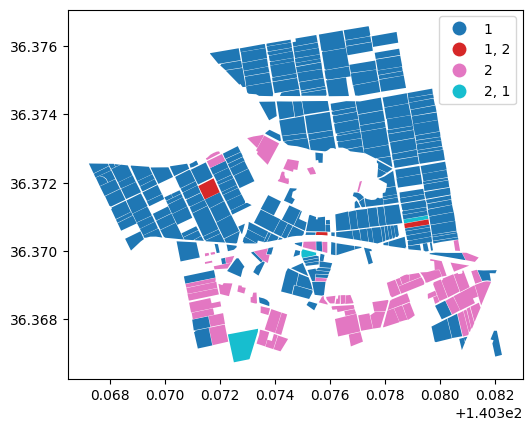

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# サンプルデータの読み込み
file_path = "./data/geojson_filtered_by_settlement/筑地.geojson"
gdf = gpd.read_file(file_path)

# 一定の距離内のポリゴンの分類を基に変更を行う関数
def reclassify_land(gdf, distance):
    # 各ポリゴンの新しい分類を格納するリスト
    new_classifications = gdf["ClassificationOfLand"].copy()

    for i, geom in gdf.iterrows():
        # 一定の距離内のポリゴンを検索
        buffer = geom.geometry.buffer(distance)
        nearby = gdf[gdf.geometry.intersects(buffer)]

        # 一定の距離内のポリゴンの分類と面積を取得
        neighbor_classifications = nearby["ClassificationOfLand"]
        neighbor_areas = nearby.geometry.area

        # 面積の合計を計算
        total_area = neighbor_areas.sum()
        rice_area = neighbor_areas[neighbor_classifications == "1"].sum()
        field_area = neighbor_areas[neighbor_classifications == "2"].sum()

        # 現在の分類
        current_classification = geom["ClassificationOfLand"]
        current_area = geom.geometry.area

        # 一定の距離内のポリゴンの分類に基づいて変更
        if current_classification == "2" and rice_area + current_area > field_area:
            new_classifications[i] = "1"
        elif current_classification == "1" and field_area + current_area > rice_area:
            new_classifications[i] = "2"

    # 新しい分類を適用
    gdf["ClassificationOfLand"] = new_classifications
    return gdf

# 土地の分類を再分類
distance = 10  # 例: 100メートル以内のポリゴンを考慮
gdf = reclassify_land(gdf, distance/1000/100)

# 結果を表示
gdf.plot(column="ClassificationOfLand", legend=True)
plt.show()